# Question 
Forecast the Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.

In [66]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Dataset

data=pd.read_csv("Airlines+Data.csv")
data.head()

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121


In [3]:
df = pd.read_excel("Airlines+Data.xlsx")
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [4]:
df.shape

(96, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [6]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [7]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [8]:
df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [9]:
data1=df.set_index('Month')

In [10]:
data1

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


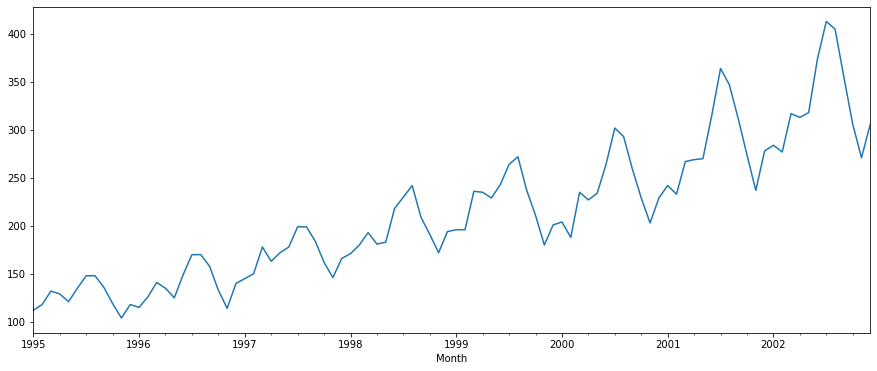

In [11]:
data1['Passengers'].plot(figsize=(15, 6))
plt.show()

array([[<AxesSubplot:title={'center':'Passengers'}>]], dtype=object)

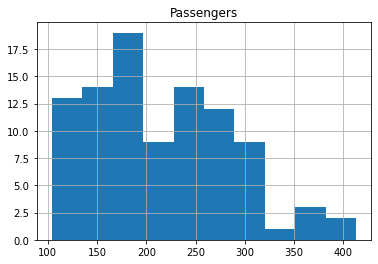

In [12]:
data1.hist()

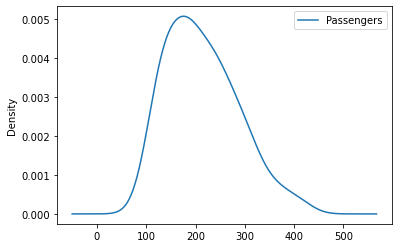

In [13]:
data1.plot(kind="kde")
plt.show()

#### Making seasonal_decompose graph from statsmodels.tsa.seasonal library And Analysis the Trend, Seasonal And Residuals in dataset

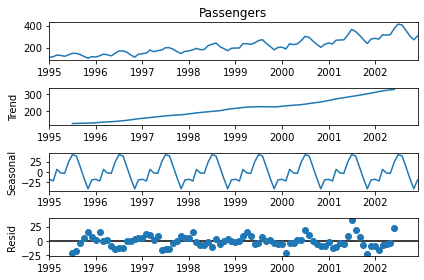

'\n# model : {"additive", "multiplicative"}-optional, Type of seasonal component. Abbreviations are accepted.\n# tsa = Time Series analysis  \n# seasonal_decompose = Seasonal decomposition using moving averages.'

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose   

ts_add = seasonal_decompose(data1['Passengers'],model="additive")
fig = ts_add.plot()
plt.show()

'''
# model : {"additive", "multiplicative"}-optional, Type of seasonal component. Abbreviations are accepted.
# tsa = Time Series analysis  
# seasonal_decompose = Seasonal decomposition using moving averages.'''

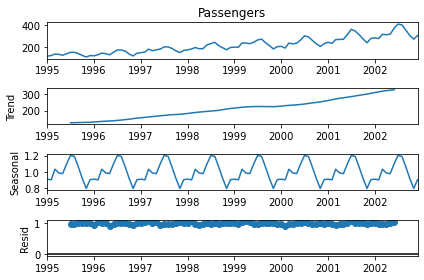

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts_add = seasonal_decompose(data1['Passengers'],model="multiadditive")
fig = ts_add.plot()
plt.show()

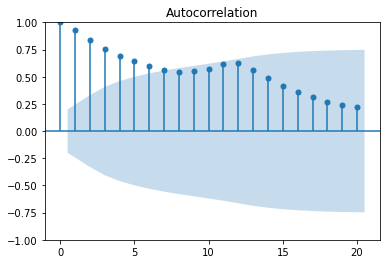

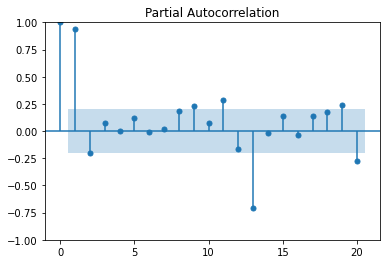

In [48]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data1['Passengers'])
tsa_plots.plot_pacf(data1['Passengers'])
plt.show()

###### tsa_plots produces a plot of one or more time series or sequence variables, to understand dataset easily 

### separate out a validation dataset

In [17]:
splitA=len(data1) - 15    # Substract few rows from original data

dataset, validation = data1[0:splitA], data1[splitA:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

Dataset 81, Validation 15


In [18]:
dataset.to_csv('dataset.csv',header=False)
validation.to_csv('validation.csv', header=False)

## Persistence(Base) model

In [19]:
# evaluate a persistence model
# load data
# make new dataframe by use of dataset.csv (splited in above cell)
train = pd.read_csv('dataset.csv',header=None, index_col=0, squeeze=True) #parse_dates=True,
train

0
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2001-05-01    270
2001-06-01    315
2001-07-01    364
2001-08-01    347
2001-09-01    312
Name: 1, Length: 81, dtype: int64

In [20]:
# prepare data
X = train.values # int64
X

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312], dtype=int64)

In [21]:
X = X.astype('float32')
X

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181., 183., 218., 230., 242.,
       209., 191., 172., 194., 196., 196., 236., 235., 229., 243., 264.,
       272., 237., 211., 180., 201., 204., 188., 235., 227., 234., 264.,
       302., 293., 259., 229., 203., 229., 242., 233., 267., 269., 270.,
       315., 364., 347., 312.], dtype=float32)

In [22]:
train_size = int(len(X) * 0.75)  # take 50% data for training 
train_size

60

In [23]:
train, test=X[0:train_size], X[train_size:]

In [24]:
train

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181., 183., 218., 230., 242.,
       209., 191., 172., 194., 196., 196., 236., 235., 229., 243., 264.,
       272., 237., 211., 180., 201.], dtype=float32)

In [25]:
test

array([204., 188., 235., 227., 234., 264., 302., 293., 259., 229., 203.,
       229., 242., 233., 267., 269., 270., 315., 364., 347., 312.],
      dtype=float32)

In [26]:
# walk-forward validation

history = [x for x in train]
history

[112.0,
 118.0,
 132.0,
 129.0,
 121.0,
 135.0,
 148.0,
 148.0,
 136.0,
 119.0,
 104.0,
 118.0,
 115.0,
 126.0,
 141.0,
 135.0,
 125.0,
 149.0,
 170.0,
 170.0,
 158.0,
 133.0,
 114.0,
 140.0,
 145.0,
 150.0,
 178.0,
 163.0,
 172.0,
 178.0,
 199.0,
 199.0,
 184.0,
 162.0,
 146.0,
 166.0,
 171.0,
 180.0,
 193.0,
 181.0,
 183.0,
 218.0,
 230.0,
 242.0,
 209.0,
 191.0,
 172.0,
 194.0,
 196.0,
 196.0,
 236.0,
 235.0,
 229.0,
 243.0,
 264.0,
 272.0,
 237.0,
 211.0,
 180.0,
 201.0]

In [27]:
predictions = list()

for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    
    # observation
    obs = test[i]
    history.append(obs)
    
    print('Predicted=%.3f, Expected=%.3f' % (yhat, obs)) # obs=observation

Predicted=201.000, Expected=204.000
Predicted=204.000, Expected=188.000
Predicted=188.000, Expected=235.000
Predicted=235.000, Expected=227.000
Predicted=227.000, Expected=234.000
Predicted=234.000, Expected=264.000
Predicted=264.000, Expected=302.000
Predicted=302.000, Expected=293.000
Predicted=293.000, Expected=259.000
Predicted=259.000, Expected=229.000
Predicted=229.000, Expected=203.000
Predicted=203.000, Expected=229.000
Predicted=229.000, Expected=242.000
Predicted=242.000, Expected=233.000
Predicted=233.000, Expected=267.000
Predicted=267.000, Expected=269.000
Predicted=269.000, Expected=270.000
Predicted=270.000, Expected=315.000
Predicted=315.000, Expected=364.000
Predicted=364.000, Expected=347.000
Predicted=347.000, Expected=312.000


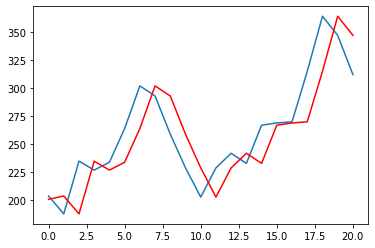

In [28]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

###### A line plot is created showing the expected values (blue) compared to the rolling forecast predictions (red). We can see the values show some trend and are in the correct scale

In [29]:
from math import sqrt
from sklearn.metrics import mean_squared_error


rmse = sqrt(mean_squared_error(test, predictions))  # report performance
print('RMSE: %.3f' % rmse)

RMSE: 27.404


In [30]:
mean = np.mean(test, ) # predictions, # _squared_error
print('mean: %.3f' % mean) 

mean: 261.238


In [31]:
# grid search ARIMA parameters for a time series
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE

from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.70)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    
     # make predictions
    predictions = list()
    for i in range(len(test)):
        model = ARIMA(history, order = arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[i])
        
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [32]:
# evaluate combinations of p, d and q values for an ARIMA model

def evaluate_models(dataset, p_values, d_values, q_values):
    
    dataset = dataset.astype('float32')
    
    best_score, best_cfg = float('inf'), None
    
    for p,d,q in itertools.product(p_values, d_values, q_values):
    #for p in p_values:
    #    for d in d_values:
    #        for q in q_values:
    
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA %s RMSE=%.3f' % (best_cfg, best_score))

In [33]:
import itertools
L1 = [1,2,3,4,5]
L2 = ['A','B','C']
L3 = [9,8,7]

for x,y,z in itertools.product(L1,L2,L3):
    print(x,y,z)

1 A 9
1 A 8
1 A 7
1 B 9
1 B 8
1 B 7
1 C 9
1 C 8
1 C 7
2 A 9
2 A 8
2 A 7
2 B 9
2 B 8
2 B 7
2 C 9
2 C 8
2 C 7
3 A 9
3 A 8
3 A 7
3 B 9
3 B 8
3 B 7
3 C 9
3 C 8
3 C 7
4 A 9
4 A 8
4 A 7
4 B 9
4 B 8
4 B 7
4 C 9
4 C 8
4 C 7
5 A 9
5 A 8
5 A 7
5 B 9
5 B 8
5 B 7
5 C 9
5 C 8
5 C 7


In [34]:
# load dataset
train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
train

0
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2001-05-01    270
2001-06-01    315
2001-07-01    364
2001-08-01    347
2001-09-01    312
Name: 1, Length: 81, dtype: int64

In [35]:
# evaluate parameters

p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)

In [36]:
evaluate_models(train.values,p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=84.466
ARIMA(0, 0, 1) RMSE=47.441
ARIMA(0, 0, 2) RMSE=35.993


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(0, 0, 3) RMSE=31.730


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(0, 0, 4) RMSE=32.948
ARIMA(0, 1, 0) RMSE=27.622
ARIMA(0, 1, 1) RMSE=26.867
ARIMA(0, 1, 2) RMSE=27.134
ARIMA(0, 1, 3) RMSE=27.659
ARIMA(0, 1, 4) RMSE=25.798
ARIMA(0, 2, 0) RMSE=33.991
ARIMA(0, 2, 1) RMSE=27.804
ARIMA(0, 2, 2) RMSE=27.078
ARIMA(0, 2, 3) RMSE=28.069


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(0, 2, 4) RMSE=26.426
ARIMA(0, 3, 0) RMSE=53.061
ARIMA(0, 3, 1) RMSE=34.239
ARIMA(0, 3, 2) RMSE=28.384
ARIMA(0, 3, 3) RMSE=27.568


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(0, 3, 4) RMSE=27.734
ARIMA(0, 4, 0) RMSE=91.412
ARIMA(0, 4, 1) RMSE=53.477
ARIMA(0, 4, 2) RMSE=34.862
ARIMA(0, 4, 3) RMSE=29.305


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 4, 4) RMSE=32.958
ARIMA(1, 0, 0) RMSE=28.034
ARIMA(1, 0, 1) RMSE=26.877
ARIMA(1, 0, 2) RMSE=27.202
ARIMA(1, 0, 3) RMSE=28.841


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 4) RMSE=26.788
ARIMA(1, 1, 0) RMSE=27.339
ARIMA(1, 1, 1) RMSE=26.525
ARIMA(1, 1, 2) RMSE=25.785
ARIMA(1, 1, 3) RMSE=26.217
ARIMA(1, 1, 4) RMSE=26.257
ARIMA(1, 2, 0) RMSE=33.499
ARIMA(1, 2, 1) RMSE=27.572
ARIMA(1, 2, 2) RMSE=26.791


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 3) RMSE=27.146


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 4) RMSE=28.376
ARIMA(1, 3, 0) RMSE=46.322
ARIMA(1, 3, 1) RMSE=33.710
ARIMA(1, 3, 2) RMSE=33.348


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 3, 3) RMSE=26.915


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(1, 3, 4) RMSE=27.260
ARIMA(1, 4, 0) RMSE=72.918
ARIMA(1, 4, 1) RMSE=46.663


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 4, 2) RMSE=34.335


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 4, 3) RMSE=33.657


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 4, 4) RMSE=28.042
ARIMA(2, 0, 0) RMSE=27.418
ARIMA(2, 0, 1) RMSE=27.156


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2) RMSE=26.834


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(2, 0, 3) RMSE=26.615


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(2, 0, 4) RMSE=27.915
ARIMA(2, 1, 0) RMSE=26.703
ARIMA(2, 1, 1) RMSE=25.846


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(2, 1, 2) RMSE=25.414


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(2, 1, 3) RMSE=24.703


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(2, 1, 4) RMSE=26.575
ARIMA(2, 2, 0) RMSE=31.453
ARIMA(2, 2, 1) RMSE=26.914


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2) RMSE=26.954


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(2, 2, 3) RMSE=26.224


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(2, 2, 4) RMSE=28.086
ARIMA(2, 3, 0) RMSE=39.990
ARIMA(2, 3, 1) RMSE=31.699


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 3, 2) RMSE=325140.488


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(2, 3, 3) RMSE=27.413


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(2, 3, 4) RMSE=28.485
ARIMA(2, 4, 0) RMSE=55.789
ARIMA(2, 4, 1) RMSE=40.312


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(2, 4, 2) RMSE=33.670


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(2, 4, 3) RMSE=33.443


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(2, 4, 4) RMSE=30.819
ARIMA(3, 0, 0) RMSE=27.051


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 1) RMSE=27.287


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(3, 0, 2) RMSE=27.207


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(3, 0, 3) RMSE=26.636


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(3, 0, 4) RMSE=26.855
ARIMA(3, 1, 0) RMSE=27.116
ARIMA(3, 1, 1) RMSE=26.138


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 2) RMSE=25.800


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(3, 1, 3) RMSE=23.545


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(3, 1, 4) RMSE=26.507
ARIMA(3, 2, 0) RMSE=31.652
ARIMA(3, 2, 1) RMSE=27.291


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 2, 2) RMSE=26.279


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(3, 2, 3) RMSE=25.963


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(3, 2, 4) RMSE=28.476
ARIMA(3, 3, 0) RMSE=39.283
ARIMA(3, 3, 1) RMSE=31.894


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 3, 2) RMSE=31.917


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(3, 3, 3) RMSE=26.977


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(3, 3, 4) RMSE=28.842
ARIMA(3, 4, 0) RMSE=52.210
ARIMA(3, 4, 1) RMSE=39.626


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(3, 4, 2) RMSE=38.904


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(3, 4, 3) RMSE=36.634


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(3, 4, 4) RMSE=28.432
ARIMA(4, 0, 0) RMSE=27.447


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(4, 0, 1) RMSE=26.722


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(4, 0, 2) RMSE=27.808


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(4, 0, 3) RMSE=25.764


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(4, 0, 4) RMSE=27.596
ARIMA(4, 1, 0) RMSE=27.229


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2) RMSE=27.059


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(4, 1, 3) RMSE=25.498


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(4, 1, 4) RMSE=25.767
ARIMA(4, 2, 0) RMSE=30.982


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 2, 1) RMSE=27.361


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(4, 2, 2) RMSE=27.770


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(4, 2, 3) RMSE=26.944


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(4, 2, 4) RMSE=25.911
ARIMA(4, 3, 0) RMSE=37.329
ARIMA(4, 3, 1) RMSE=31.217


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(4, 3, 2) RMSE=30.461


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(4, 3, 3) RMSE=27.584


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(4, 3, 4) RMSE=29.842
ARIMA(4, 4, 0) RMSE=48.659


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(4, 4, 1) RMSE=37.641


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(4, 4, 2) RMSE=31.866


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(4, 4, 3) RMSE=37.228


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

ARIMA(4, 4, 4) RMSE=32.156
Best ARIMA (3, 1, 3) RMSE=23.545


C:\Users\Rishb\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### Build Model based on the optimized values

In [37]:
# prepare data
X = train.values
X = X.astype('float32')

In [38]:
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
# fit model
model = ARIMA(X, order=(2,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps = 15)
forecast

array([307.37304162, 314.25891865, 316.99402297, 316.0834306 ,
       315.2356997 , 315.23782188, 315.43239643, 315.47926734,
       315.44613409, 315.42734048, 315.43035107, 315.43538594,
       315.43592219, 315.43490015, 315.43452864])

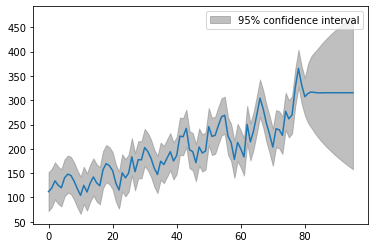

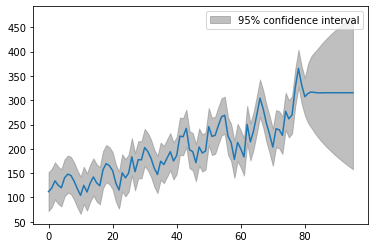

In [39]:
from statsmodels.graphics.tsaplots import plot_predict

plot_predict(model_fit,1,96)
#model_fit.plot_predict(1, 96)

In [40]:
#Error on the test data

val = pd.read_csv('validation.csv', header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

48.853176296593475

In [41]:
val = pd.read_csv('validation.csv', header=None)
mse = mean_squared_error(val[1], forecast)
mse

2386.6328342660427

#### Combine train and test data and build final model


In [42]:
# fit model
data = pd.read_csv('Airlines+Data.csv', header=0, index_col=0, parse_dates=True)

# prepare data
X = train.values
X = X.astype('float32')

In [43]:
model_combine = ARIMA(X, order=(2,1,0))
model_combine_fit = model.fit()

In [44]:
forecast_a=model_combine_fit.forecast(steps=10)
forecast_a

array([307.37304162, 314.25891865, 316.99402297, 316.0834306 ,
       315.2356997 , 315.23782188, 315.43239643, 315.47926734,
       315.44613409, 315.42734048])

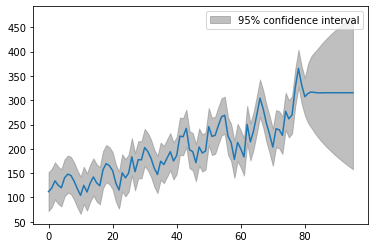

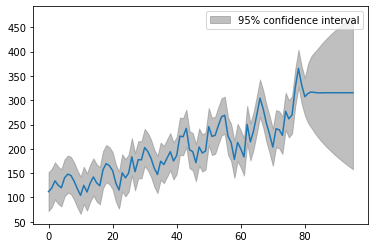

In [45]:
plot_predict(model_combine_fit,1,96) 

## **Smoothing 

In [63]:
# Make new train and test split

Train = df.head(75)
Test = df.tail(21)

In [72]:
Train

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
70,2000-11-01,203
71,2000-12-01,229
72,2001-01-01,242
73,2001-02-01,233


#### Evaluation Metric MAPE

In [64]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

#### Simple Exponential Method

In [74]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)

21.264745162517233

#### Holts Method

In [76]:
holt_model = Holt(Train["Passengers"]).fit(smoothing_level=0.75, smoothing_slope=0.25)
pred_holt = holt_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_holt,Test.Passengers)

12.228644593023235

#### Holts Winter Exponential Smoothing with Additive Seasonality and Additive Arend

In [77]:
'''Here select Seasonal and Trend = Additive and make model'''

hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],
                                         seasonal="add",
                                         trend="add",
                                         seasonal_periods=12).fit() #add the trend to the model # hwe = Holt Winter Exponential

pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)

11.134437160138903

In [84]:
print(hwe_model_add_add.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:               Passengers   No. Observations:                   75
Model:             ExponentialSmoothing   SSE                           3078.319
Optimized:                         True   AIC                            310.599
Trend:                         Additive   BIC                            347.679
Seasonal:                Multiplicative   AICC                           322.813
Seasonal Periods:                    12   Date:                 Sat, 10 Sep 2022
Box-Cox:                          False   Time:                         18:58:57
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.6152689                alpha                 True
smoothing_trend          

#### Holts Winter Exponential Smoothing with multiplicative Seasonality and Additive Arend

In [90]:
'''Here select Seasonal = multiplicative and Trend = Additive and make model'''

hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],
                                         seasonal="mul",
                                         trend="add",
                                         seasonal_periods=12).fit() #add the trend to the model # hwe = Holt Winter Exponential

pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)

10.94706560158306

In [85]:
print(hwe_model_mul_add.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:               Passengers   No. Observations:                   75
Model:             ExponentialSmoothing   SSE                           3078.319
Optimized:                         True   AIC                            310.599
Trend:                         Additive   BIC                            347.679
Seasonal:                Multiplicative   AICC                           322.813
Seasonal Periods:                    12   Date:                 Sat, 10 Sep 2022
Box-Cox:                          False   Time:                         18:59:19
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.6152689                alpha                 True
smoothing_trend          

In [92]:
'''Here select Seasonal = Additive and Trend = multiplicative and make model'''

hwe_model_add_mul = ExponentialSmoothing(Train["Passengers"],
                                         seasonal="add",
                                         trend="mul",
                                         seasonal_periods=12).fit() #add the trend to the model # hwe = Holt Winter Exponential

pred_hwe_add_mul = hwe_model_add_mul.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_mul,Test.Passengers)

10.569553309435111

In [93]:
'''Here select Seasonal = multiplicative and Trend = multiplicative and make model'''

hwe_model_mul_mul = ExponentialSmoothing(Train["Passengers"],
                                         seasonal="mul",
                                         trend="mul",
                                         seasonal_periods=12).fit() #add the trend to the model # hwe = Holt Winter Exponential

pred_hwe_mul_mul = hwe_model_mul_mul.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_mul,Test.Passengers)

8.093262370428036

### Final Model by combining train and test

In [100]:
# Seasonal = Multiplicate and Trend = Additive

final_model1 = ExponentialSmoothing(df["Passengers"],
                                    seasonal="mul",
                                    trend="add",
                                    seasonal_periods=12).fit()

In [110]:
#Forecasting for next 20 time periods

Value1 = final_model1.forecast(20)
Value1

96     312.899560
97     308.171547
98     355.533060
99     345.770145
100    345.696478
101    392.471215
102    436.501917
103    429.859801
104    380.173448
105    332.317859
106    290.626129
107    330.590939
108    337.371085
109    332.117236
110    382.981123
111    372.293845
112    372.046089
113    422.197266
114    469.355523
115    462.011822
dtype: float64

In [102]:
# Seasonal = Additive and Trend = Multiplicate

final_model2 = ExponentialSmoothing(df["Passengers"],
                                    seasonal="add",
                                    trend="mul",
                                    seasonal_periods=12).fit()

In [111]:
#Forecasting for next 20 time periods

Value2 = final_model2.forecast(20)
Value2

96     323.380870
97     316.600638
98     356.263375
99     353.746492
100    359.579890
101    413.217133
102    451.428443
103    440.170206
104    390.709842
105    344.883974
106    312.731032
107    361.705947
108    369.068377
109    362.720987
110    402.820665
111    400.744863
112    407.023520
113    461.110242
114    499.775288
115    488.975087
dtype: float64

In [105]:
# Seasonal = Multiplicate and Trend = Multiplicate

final_model3 = ExponentialSmoothing(df["Passengers"],
                                    seasonal="mul",
                                    trend="mul",
                                    seasonal_periods=12).fit()

In [112]:
Value3 = final_model3.forecast(20)
Value3

96     315.020860
97     311.710092
98     361.242219
99     352.911724
100    354.367837
101    403.885545
102    450.864589
103    445.627337
104    395.607920
105    347.205801
106    304.942016
107    348.184632
108    357.251641
109    353.497041
110    409.669301
111    400.222044
112    401.873359
113    458.029268
114    511.306185
115    505.366843
dtype: float64

In [107]:
# Seasonal = Additive and Trend = Additive

final_model4 = ExponentialSmoothing(df["Passengers"],
                                    seasonal="add",
                                    trend="add",
                                    seasonal_periods=12).fit()

In [132]:
Value4 = final_model4.forecast(20)
Value4

96     319.235246
97     311.528357
98     350.278659
99     346.984945
100    351.844989
101    403.925662
102    440.566741
103    427.446405
104    376.628089
105    329.767420
106    296.561189
107    341.114647
108    347.229207
109    339.522319
110    378.272621
111    374.978907
112    379.838951
113    431.919624
114    468.560703
115    455.440367
dtype: float64